In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from cleaning import clean_data
from logistics import sigmoid

In [2]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
for column_name in df.columns:
    column = df[column_name]
    count = (column == 0).sum()
    print(column_name , count)

Pregnancies 111
Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0
Outcome 500


In [4]:
zeros_not_req = df.columns

In [5]:
zeros_not_req = zeros_not_req.drop('Pregnancies')
zeros_not_req = zeros_not_req.drop('Outcome')

In [6]:
zeros_not_req

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [7]:
for column in zeros_not_req:
    df[column] = df[column].replace(0,np.NaN)
    mean = df[column].mean(skipna=True)
    df[column] = df[column].replace(np.NaN,mean)

In [8]:
df = clean_data(df)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.630250,0.942357,-0.051299,1.048394,0.183502,0.235926,0.887076,1.387353,1
1,-0.906230,-1.188420,-0.580615,0.052905,0.183502,-0.876844,-0.267120,-0.212676,0
2,1.244842,2.126122,-0.757054,0.078359,0.183502,-1.401435,1.075260,-0.128464,1
3,-0.906230,-1.053133,-0.580615,-0.942585,-0.997939,-0.638393,-1.036585,-1.054796,0
5,0.322954,-0.139942,0.125139,0.078359,0.183502,-1.035811,-0.894401,-0.296888,0
...,...,...,...,...,...,...,...,...,...
762,1.552138,-1.053133,-0.933492,0.078359,0.183502,-1.528609,-1.141132,-0.044252,0
764,-0.598934,0.062989,-0.227738,-0.278925,0.183502,0.744620,-0.313121,-0.549524,0
765,0.322954,0.029167,-0.051299,-0.942585,-0.652422,-0.940431,-0.710399,-0.296888,0
766,-0.906230,0.198276,-1.109931,0.078359,0.183502,-0.320459,-0.275484,1.134717,1


In [9]:
missing_values = df.isna().sum() + df.isnull().sum()

print("Missing values per column:")
print(missing_values)

Missing values per column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [10]:
from sklearn.model_selection import train_test_split

x = df.drop("Outcome", axis=1)
y = df["Outcome"]  

x = x.values 
y = y.values 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y,random_state=69)

In [11]:
n = x_test.shape[1]
w = np.zeros(n)
b = 3

In [12]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize weights and bias
n = x_train.shape[1]
w = np.zeros(n)
b = 3

# Define the logistic regression model
def logistic_regression(w, b, x):
    z = np.dot(x, w) + b
    return sigmoid(z)

# Define the loss function (cross-entropy)
def loss(w, b, x, y):
    m = len(y)
    pred = logistic_regression(w, b, x)
    loss_val = -y * np.log(pred) - (1 - y) * np.log(1 - pred)
    return np.mean(loss_val)

# Define the gradient descent step
def gradient_descent(w, b, x, y, learning_rate=0.01):
    m = len(y)
    pred = logistic_regression(w, b, x)
    dw = np.dot(x.T, (pred - y)) / m
    db = np.sum(pred - y) / m
    w -= learning_rate * dw
    b -= learning_rate * db
    return w, b

# Train the logistic regression model
def train_logistic_regression(w, b, x, y, num_iterations=100000, learning_rate=0.01):
    iters = []
    cost_vals = []
    for i in range(num_iterations):
        iters.append(i)
        w, b = gradient_descent(w, b, x, y, learning_rate)
        cost_vals.append(loss(w, b, x, y))
    
    
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=iters, y=cost_vals, marker='o', linestyle='-')
    plt.title('Learning Curve')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Cost')
    plt.show()
    
    return w, b

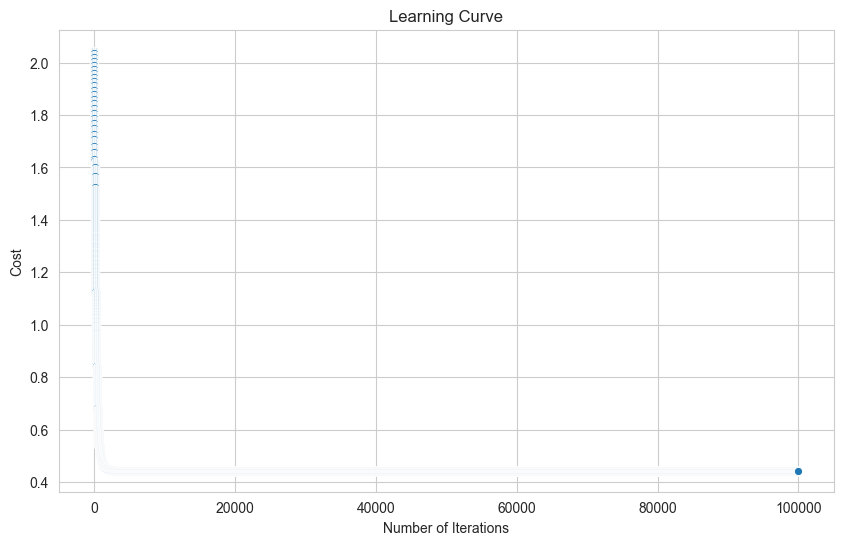

In [13]:
w, b = train_logistic_regression(w, b, x_train, y_train)

In [14]:
loss(w, b, x_train, y_train)

0.4431895731392935

In [20]:
y_pred = []
m = x_test.shape[0]

for i in range(m):
    y_pred_prob = logistic_regression(w, b, x_test[i])
    
    if y_pred_prob >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

# Convert the list of predicted labels to a NumPy array
y_pred = np.array(y_pred)


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Accuracy: 0.76
Precision: 0.69
Recall: 0.52
F1-Score: 0.59


In [23]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred)
confusion

array([[74, 10],
       [20, 22]], dtype=int64)

In [ ]:
#  [[74 10]
#  [20 22]]
 
# ([[74, 10],
#  [20, 22]]